In [1]:
import numpy as np
import pandas as pd 
from mlxtend.plotting import plot_decision_regions

In [3]:
df=pd.DataFrame()

In [4]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]


In [5]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

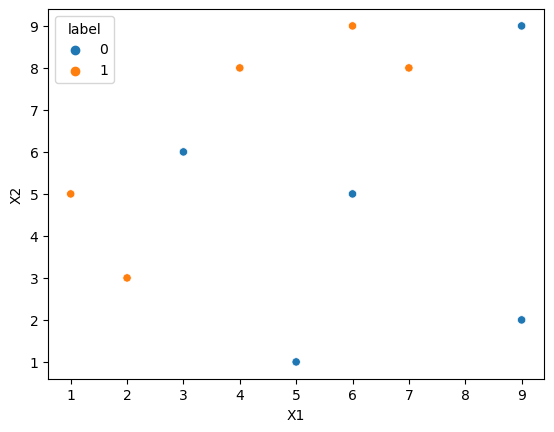

In [6]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df["X2"],hue=df['label'])

In [9]:
df['weights']=1/df.shape[0]
#Calculating the weights for each row

In [10]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt1=DecisionTreeClassifier(max_depth=1)

- Here we need Decision Stumps for classification , that's why max_depth=1 which make Decision tree Decision Stumps

In [19]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

- Training the 1st model

In [20]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [21]:
from sklearn.tree import plot_tree

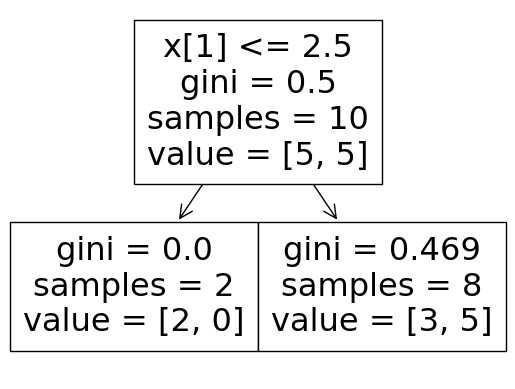

In [22]:
plot_tree(dt1);

- From above you can see that , Since the Depth of our Decision tree is 1 , its splitting only at one node creating max height of 1 . This Is Decision Stump

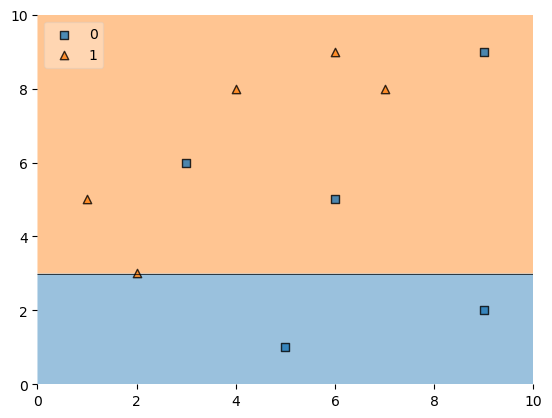

In [25]:
plot_decision_regions(X,y,clf=dt1,legend=2);
#Decision Region For !st Decison Stump

In [27]:
df['y_pred']=dt1.predict(X)

In [30]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


- From above you can see that model is making 3 mistakes or error at some rows , such that error of this Decision stump will be 0.3

In [31]:
#Defining function for caculating the weight of model.
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error) #Standard formula for calculating weight

In [33]:
alpha1=calculate_model_weight(0.3)
alpha1
#Error rate of 1st Decision Stump is given Below

0.42364893019360184

- Upadting the weights based on error and weight of model

In [36]:
def update_row_weights(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

- From above fuction we are increasing the weight of rows which are misclassified(rows with error).
- Such that decreasing the weight of rows which are correctly classified.

In [37]:
df['updated_weights']=df.apply(update_row_weights,axis=1)

In [38]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


- from above you can see that rows with erroe have weight 0.152653(greater weight) while row with no error have minimum weight 0.065508

In [41]:
df['updated_weights'].sum()

0.9165153319682015

- Since the Sum of Coumn is not equal to one we need to normalize the weight.


In [42]:
df['normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [43]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [44]:
df['normalized_weights'].sum()

1.0

- From above you can see that total weight of all columns is 1 such that we have normalized it

### Defining Range for the weights

In [45]:
df['cumsum_upper']=np.cumsum(df['normalized_weights'])

In [46]:
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weights']

In [47]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


- Creating a new dataset
- randomly selecting numbers and picking the rows on the basis of the random numbers in between their ranges

In [50]:
def create_new_dataset(df):
    indices=[]
    for i in range (df.shape[0]):
        a=np.random.random()
        for index,rows in df.iterrows():
            if rows['cumsum_upper']>a and a>rows['cumsum_lower']:
                indices.append(index)
    return indices

In [52]:
index_values=create_new_dataset(df)
index_values

[1, 8, 3, 8, 2, 7, 8, 8, 3, 2]

- from above you can see that , random index are selected. and base on that rows will get selected

In [55]:
second_df=df.iloc[index_values,[0,1,2,3]]
second_df
#Selcting all rows and only 4 column for new dataset in the next model

,X1,X2,label,weights
1,2,3,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
2,3,6,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
3,4,8,1,0.1
2,3,6,0,0.1


- Above dataset is the new dataset for the next Decision Stump.(next model)

In [56]:
#Second Model
dt2=DecisionTreeClassifier(max_depth=1)

In [58]:
X=second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values

In [59]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

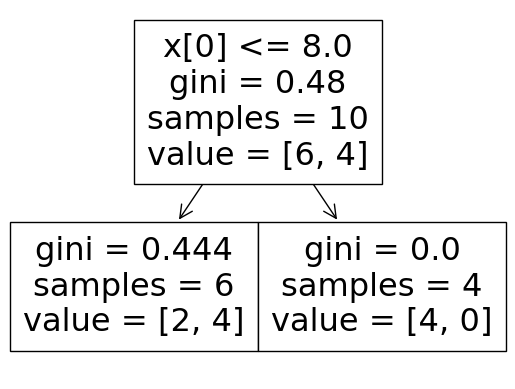

In [62]:
plot_tree(dt2)

<Axes: >

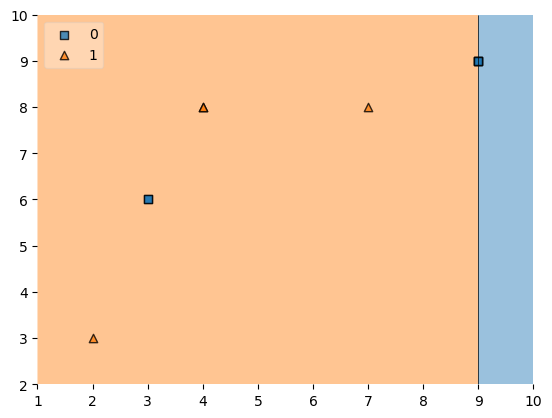

In [63]:
plot_decision_regions(X,y,clf=dt2,legend=2)

In [65]:
second_df['y_pred']=dt2.predict(X)
second_df

,X1,X2,label,weights,y_pred
1,2,3,1,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
8,9,9,0,0.1,0
2,3,6,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,0
8,9,9,0,0.1,0
3,4,8,1,0.1,1
2,3,6,0,0.1,1


- From above you can see that model is making 2 mistakes or error at some rows , such that error of this Decision stump will be 0.2

In [66]:
alpha2=calculate_model_weight(0.2)

In [67]:
alpha2

0.6931471805599453

In [71]:
#updating weights
def update_row_weights(row,alpha=0.693):
    if row['label']== row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

- From above fuction we are increasing the weight of rows which are misclassified(rows with error).
- Such that decreasing the weight of rows which are correctly classified.

In [72]:
second_df['updated_weights']=second_df.apply(update_row_weights,axis=1)


In [73]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
1,2,3,1,0.1,1,0.050007
8,9,9,0,0.1,0,0.050007
3,4,8,1,0.1,1,0.050007
8,9,9,0,0.1,0,0.050007
2,3,6,0,0.1,1,0.199971
7,7,8,1,0.1,1,0.050007
8,9,9,0,0.1,0,0.050007
8,9,9,0,0.1,0,0.050007
3,4,8,1,0.1,1,0.050007
2,3,6,0,0.1,1,0.199971


- from above you can see that rows with erroe have weight 0.199971(greater weight) while row with no error have minimum weight 0.050007

In [74]:
#normalizing the weights
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [75]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
1,2,3,1,0.1,1,0.050007,0.062509
8,9,9,0,0.1,0,0.050007,0.062509
3,4,8,1,0.1,1,0.050007,0.062509
8,9,9,0,0.1,0,0.050007,0.062509
2,3,6,0,0.1,1,0.199971,0.249963
7,7,8,1,0.1,1,0.050007,0.062509
8,9,9,0,0.1,0,0.050007,0.062509
8,9,9,0,0.1,0,0.050007,0.062509
3,4,8,1,0.1,1,0.050007,0.062509
2,3,6,0,0.1,1,0.199971,0.249963


In [76]:
second_df['nomalized_weights'].sum()

0.9999999999999999

- After normalizing all weight sum of normal weights are 1

In [77]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [78]:
second_df['cumsum_lower']=second_df['cumsum_upper']-second_df['nomalized_weights']

In [79]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
1,2,3,1,0.1,1,0.062509,0.000000,0.062509
8,9,9,0,0.1,0,0.062509,0.062509,0.125018
3,4,8,1,0.1,1,0.062509,0.125018,0.187528
8,9,9,0,0.1,0,0.062509,0.187528,0.250037
2,3,6,0,0.1,1,0.249963,0.250037,0.500000
7,7,8,1,0.1,1,0.062509,0.500000,0.562509
8,9,9,0,0.1,0,0.062509,0.562509,0.625018
8,9,9,0,0.1,0,0.062509,0.625018,0.687528
3,4,8,1,0.1,1,0.062509,0.687528,0.750037
2,3,6,0,0.1,1,0.249963,0.750037,1.000000


- Creating a range from a normalized weights.

In [80]:
index_values=create_new_dataset(second_df)

In [82]:
#Creating a new dataset for the next decision stump 
#creating 3rd new dataset with updated weights and error.
third_df=second_df.iloc[index_values,[0,1,2,3]]

- From above selecting all tows for new data and only 4 columns i.e column 0 ,1 , 2 ,3.

In [83]:
third_df

,X1,X2,label,weights
3,4,8,1,0.1
3,4,8,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1


In [85]:
#creating a third Decision Tree or third model
dt3=DecisionTreeClassifier(max_depth=1)
X=third_df.iloc[:,0:2].values
y=third_df.iloc[:,2].values

In [86]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

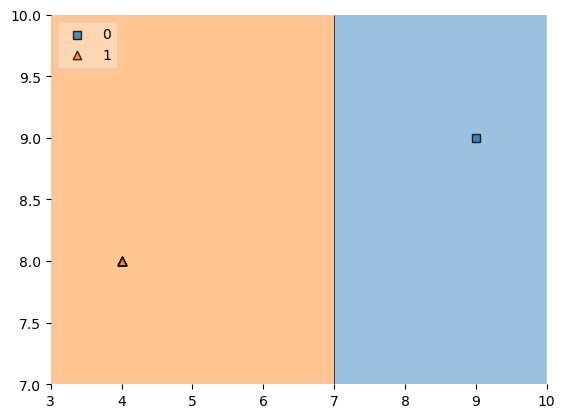

In [87]:
plot_decision_regions(X,y,clf=dt3,legend=2)

In [90]:
#Predictin vaues
third_df['y_pred']=dt3.predict(X)

In [91]:
third_df

,X1,X2,label,weights,y_pred
3,4,8,1,0.1,1
3,4,8,1,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1


- Since there were no errors or no any misclassified points in the above data there will be no weight of error rows which means error=0 [claculate_model_weight(0) will throw error on running it]

In [93]:
print(alpha1,alpha2)

0.42364893019360184 0.6931471805599453


## Prediction

In [105]:
query=np.array([1,5]).reshape(1,2)
dt1.predict(query)
# 1,5 is point for prediction

array([1], dtype=int64)

In [95]:
dt2.predict(query)

array([1], dtype=int64)

In [96]:
dt3.predict(query)

array([1], dtype=int64)

- From above you can see that we are making prediction for each Decison Stumps in form of 1 and 0.

In [98]:
alpha1*1 + alpha2*(1) 

1.1167961107535471

In [99]:
np.sign(1.11)

1.0

In [100]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)
#9 ,9 is point for prediction

array([1], dtype=int64)

In [101]:
dt2.predict(query)

array([0], dtype=int64)

In [102]:
dt3.predict(query)

array([0], dtype=int64)

- in Decison stumps we use 1 for poisitive and -1 for negative(for 0) , there is no 0 and 1

In [103]:
alpha1*(1)+alpha2*(-1)

-0.26949825036634345

In [104]:
np.sign(-0.269)

-1.0

###### Thus , from above we make a prediction using a standard formula in Adaboost and make almost accurate predictions.<br> Sklearn's Class work's same but it has capacity to handle error witj 0 value in any decision stumps.

# Conclude